<style>
.container { width: 80% !important; margin: auto; }
div.cell { padding: 10px 15% 10px 15%; }
</style>

## DTSC 2301 Spring 2026 Homework #2

Turn in your assignment via Gradescope

Due 1/25/26, 11:59pm



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import scipy.stats as st
import pylab as py

from sklearn.linear_model import LinearRegression
df = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ironman1819.csv", na_values=['NA'])
df.head()

,Bib,Name,Country,Gender,Division,Division.Rank,OverallTime,OverallRank,SwimTime,SwimRank,BikeTime,BikeRank,RunTime,RunRank,FinishStatus,Location,Year
0,1,Heather Jackson,United States,Female,FPRO,1,558.816667,2,60.966667,86,304.733333,15,188.483333,5,Finisher,LakePlacid,2018
1,7,Jen Annett,Canada,Female,FPRO,2,573.800000,4,62.966667,128,304.983333,16,200.766667,26,Finisher,LakePlacid,2018
2,2,Sarah Piampiano,United States,Female,FPRO,3,583.400000,8,64.666667,178,325.383333,40,187.516667,3,Finisher,LakePlacid,2018
3,3,Jodie Robertson,United States,Female,FPRO,4,589.933333,15,62.333333,113,314.950000,22,203.816667,36,Finisher,LakePlacid,2018
4,15,Lenny Ramsey,Netherlands,Female,FPRO,5,597.883333,23,66.450000,250,335.400000,74,189.266667,8,Finisher,LakePlacid,2018


#### Question 1
In the file `https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ironman1819.csv', there is data on female finishers of the 2018 and 2019 Ironman Triathlon in Lake Placid, NY.  We will focus on the times to complete the three elements of the triathlon, swimming (SwimTime), biking (BikeTime) and running (RunTime).  The units for each of these features is minutes.  The overall time (including transitions from on element to the next) is found in *OverallTime*. Create a scatterplot for *SwimTime* as a predictor for *RunTime*.


More on these data as well as a video introduction to them can be found at: https://isle.stat.cmu.edu/SCORE/ironman_triathlon/

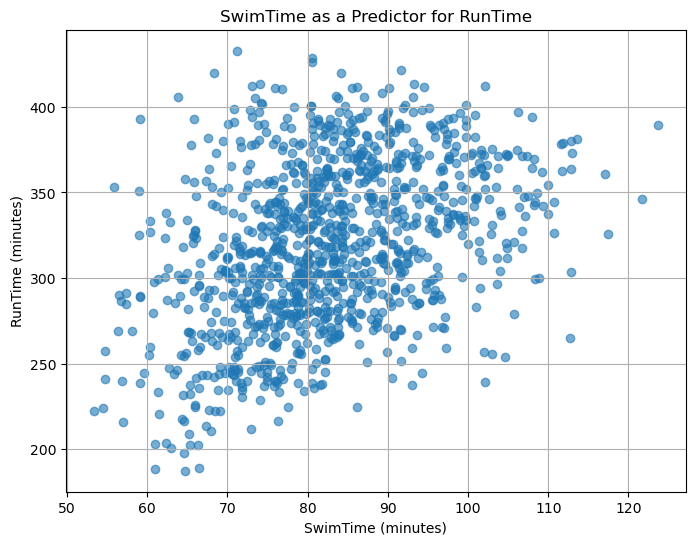

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(df['SwimTime'], df['RunTime'], alpha=0.6)
plt.xlabel('SwimTime (minutes)')
plt.ylabel('RunTime (minutes)')
plt.title('SwimTime as a Predictor for RunTime')
plt.grid(True)
plt.show()

#### Question 2
Using the Ironman Triathlon data from above, fit a regression model that predicts *OverallTime* from *BikeTime* and add that line to a scatterplot of those two variables.  Interpret the slope and the y-intercept of this model in the context of these data.  

Y-Intercept: 11.203884734248277
Slope: 1.9247873370421495
R-squared: 0.8280709273393042


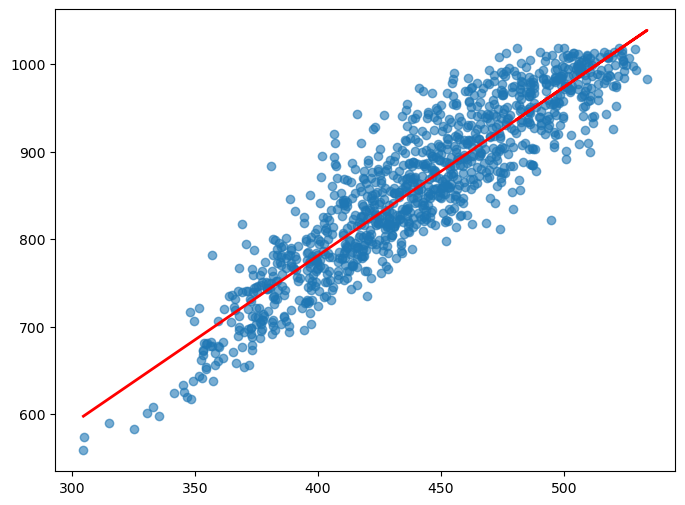

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BikeTime'], df['OverallTime'], alpha=0.6)
model = LinearRegression()
x = df[['BikeTime']]
y = df[['OverallTime']]
model.fit(x,y)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red', linewidth=2)
yintercept = model.intercept_[0]
print(f"Y-Intercept: {yintercept}")
slope = model.coef_[0][0]
print(f"Slope: {slope}")
rsquared = model.score(x, y)
print(f"R-squared: {rsquared}")

The Y Intercept is 294.126 which indicates that the variables are not completley dependent on eachother. If we had a time of 0 for runtBikeTime ime, OverallTime will still be higher because there are 2 other variables. The slope indicates there is a positive relationship as BikeTime increases, so will OverallTime

#### Question 3
Using the Ironman Triathlon data from above, fit a regression model that predicts *OverallTime* from *RunTime*.   Interpret the slope and the y-intercept of this model in the context of these data.  

Y-Intercept: 294.12626309577615
Slope: 1.774102193006777
R-squared: 0.8030507091188902


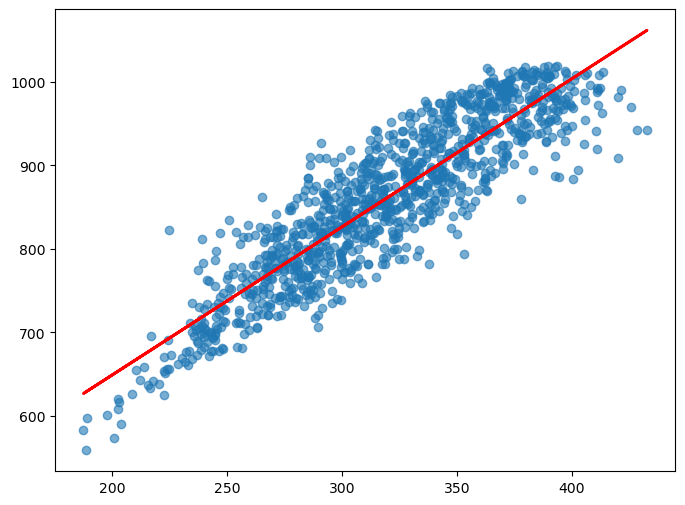

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RunTime'], df['OverallTime'], alpha=0.6)
model = LinearRegression()
x = df[['RunTime']]
y = df[['OverallTime']]
model.fit(x,y)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red', linewidth=2)
yintercept = model.intercept_[0]
print(f"Y-Intercept: {yintercept}")
slope = model.coef_[0][0]
print(f"Slope: {slope}")
rsquared = model.score(x, y)
print(f"R-squared: {rsquared}")

The Y Intercept is 294.126 which indicates that the variables are not completley dependent on eachother. If we had a time of 0 for RunTime, OverallTime will still be higher because there are 2 other variables. The slope indicates there is a positive relationship as RunTime increases, so will OverallTime

#### Question 4
Compare the model from Question 3 with the model from Question 2 and determine which model is better.  Justify your answer.

The two models are different slope which means they have different rates of positive correlation to OverallTime. A higher slope can indicate how much it weight it has in predicting OverallTime. Question 2's BikeTime model also has a slightly higher rsquared which indicates better correlation


#### Question 5
Open the first day survey data, make a new variable that is 1 if the student has a job, either on-campus or off-campus.  Call that variable *job*.  Then make a side by side boxplot of *job* vs *NumbContacts*.  Comment on whether or not there seems to be a relationship between having a job and the number of contacts in their cell phone among DTSC 2301 students.

Text(0.5, 1.0, 'Job Status vs. Number of Contacts')

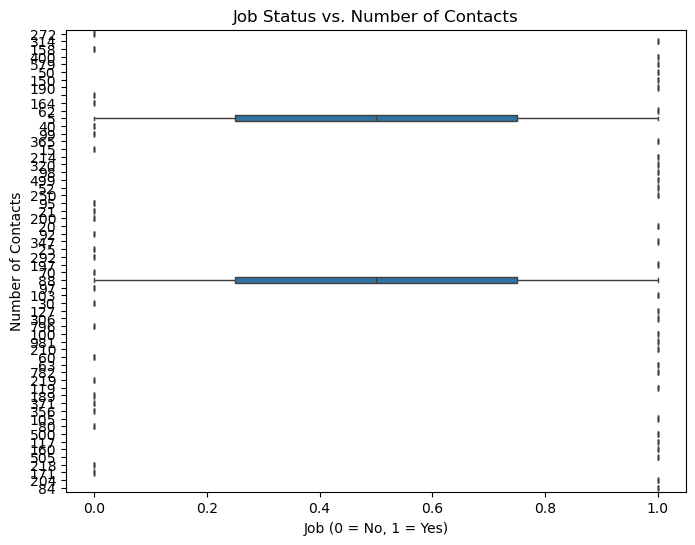

In [5]:
firstday = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/DTSC2301FirstDaySurvey_Responses_Clean.csv", na_values=['NA'])
#make a new colum 'job' that puts 1 if they have Yes for OffCampusJob or CampusJob, else 0. as the thrid column
firstday['Job'] = firstday.apply(lambda row: 1 if row['OffCampusJob'] == 'Yes' or row['CampusJob'] == 'Yes' else 0, axis=1)
firstday.head()
#boxplot fo job versus NumbContacts
plt.figure(figsize=(8, 6))
sns.boxplot(x='Job', y='NumbContacts', data=firstday)
plt.xlabel('Job (0 = No, 1 = Yes)')
plt.ylabel('Number of Contacts')
plt.title('Job Status vs. Number of Contacts')


#### Question 6

Read the article "Understanding Passive vs Proactive Ethics" by Bill Schmarzo on Canvas.  Then fill in the following blanks:
1. Proactive Ethics focuses on Being Beneficial while passive ethics focuses on Cuasing No Harm.
2. In the Good Samaritan story, passive ethics is represented by The Priest and The Levite.
3. (True or False) The author argues that "do no harm" is sufficient as an ethics standard for AI: False.

